# FALL 2021 Data Science Intern Challenge

# Question 1 Analysis
Answers to questions found below

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shopify.csv')
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

We can see here that the vast majority of orders contain 1 - 5 items, with some orders having 6 or 8 items. However, there are 17 instances where 2000 items were ordered, which is highly suspect.

In [3]:
df.loc[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
3,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
5,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
6,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
7,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
8,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
9,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


From examining all the orders where 2000 items were ordered, we can see that these all came from the same shop_id (42) and user ID (607). In addition, we can see that all of these orders were created exactly at 4 am. This appears to be an automated process from the customer to order 2000 items from this shop, most likely a bot to mass buy the product.

In addition, the maximum order amount also seems to be suspect and follows a pattern.

In [4]:
df.groupby('total_items').agg(
    mean_amount=('order_amount', np.mean),
    max_amount=('order_amount', np.max)
    )

,mean_amount,max_amount
total_items,,
1,417.364481,25725
2,750.215066,51450
3,1191.076514,77175
4,947.686007,102900
5,759.350649,1760
6,17940.000000,154350
8,1064.000000,1064
2000,704000.000000,704000


A quick observation shows that the max amounts for total_items = 1, 2, 3, 4, and 6 seems to be equal to total_items * 25725. A pair of shoes costing $25725 is fairly unbelievable, let alone multiple orders of them. These seem to indicate errors in the recording of data but would warrant further investigation.

Text(0.5, 0, 'Order')

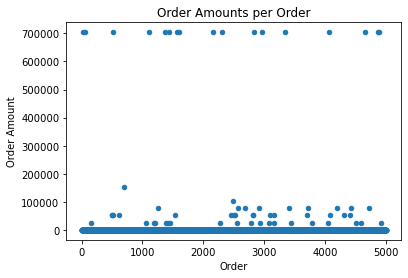

In [5]:
df.plot.scatter(x = 'order_id', y = 'order_amount', title = 'Order Amounts per Order')
plt.ylabel('Order Amount')
plt.xlabel('Order')

From examining the scatterplot of order amounts, we can see that the vast majority of orders are of normal values (the dark blue line). These purchases would in the sub-thousand to low-thousands range, which would be reasonable values for shoe orders. 

However, we can also see that there are some very, very extreme values in our dataset. Since we used mean to calculate the AOV, the extreme values from the 2000 item purchases and the $25725 pairs of shoes would signifcantly affect the mean. In order to prevent the influence of these outliers, it would be better to use the median as our evaluation metric, which is more resistent to these extreme values. Furthermore, the mediam will be found in the dark blue line which is a more accurate representation the data.

In [6]:
df['order_amount'].median()

284.0

Using median as our evaluation metric, we get an AOV of $284 which is a much more reasonable value

# Question 1 Answers
**Question 1a**

When using mean to calculate AOV, we are subjected to influence of extreme outliers possibly found in the dataset. In this case, the presence of both extremely large item purchases (2000 items) and extremely expensive items ($25725 shoes) skewed the mean greatly. In order to guard against the influence of these extreme values, the median would be a better and more robust evaluation metric.

**Question 1b**

I would report the median of the dataset as the metric of choice.

**Question 1c**
The median of the dataset is $284.

# Question 2 Answers
**Question 2a**<br>
SELECT COUNT(*) <br>
FROM ORDERS AS o, Shippers AS s <br>
WHERE o.ShipperID = s.ShipperID AND ShipperName = 'Speedy Express'

We can match Orders to Shippers via ShipperID and simply count the number of times the Shipper was Speedy Express.

**54 orders were shipped by Speedy Express in total**

**Question 2b**<br>
SELECT LastName<br>
FROM Employees AS e, Orders AS o<br>
WHERE e.EmployeeID = o.EmployeeID<br>
GROUP BY o.EmployeeID<br>
ORDER BY COUNT(*) DESC<br>
LIMIT 1

We can match Employees to Orders via EmployeeID and also count the number of occurences of each EmployeeID in Orders. Sorting by DESC and limiting the table size to 1, the table will contain the information of the Employee with the most orders shipped and then we can just select their LastName.

**Peacock is the employee with the most orders.**

**Question 2c**<br>
SELECT p.ProductID, p.ProductName, SUM(Quantity) AS Total<br>
FROM Customers AS c, Orders AS o, OrderDetails AS od, Products AS p<br>
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID<br>
GROUP BY p.ProductID<br>
ORDER BY Total DESC<br>
LIMIT 1;

We first find all the Customers from Germany and match their CustomerID to those found in Orders to get a subset of Orders. From there we can match the OrderID of these Orders with their respecitve OrderID in OrderDetails to get a subset of OrderDetails. The ProductID from the OrderDetails can then be matched with their respective Products generating a subset of Products. Finally this Product subset can be grouped by ProductID and the totals from each order summed as a new column Total. Sorting by DESC and limiting the table size to 1, the table will contain the product that was most ordered by customers in Germany.

**Boston Crab Meat was the most ordered product by customers in Germany**
